<a href="https://colab.research.google.com/github/donaann84/PROJECT/blob/main/Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load the dataset
df = pd.read_csv('/content/gym_members_exercise_tracking_synthetic_data.csv')

# Preview the dataset
df.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


In [ ]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Data types and non-null counts
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset Shape: (1800, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (day

In [ ]:
# Convert Max_BPM to numeric (object → float)
df['Max_BPM'] = pd.to_numeric(df['Max_BPM'], errors='coerce')

# Impute missing numerical columns with median
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.median()))

# Impute categorical columns with mode
categorical_cols = ['Gender', 'Workout_Type']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check for any remaining missing values
print("Remaining missing values:\n", df.isnull().sum().sort_values(ascending=False).head())


Remaining missing values:
 Age            0
Gender         0
Weight (kg)    0
Height (m)     0
Max_BPM        0
dtype: int64


In [ ]:
df.describe()


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,34.467222,67.578444,1.739100,180.245000,146.255000,63.962222,1.391322,1033.651667,23.516389,2.707889,3.328333,1.829444,19.936644
std,12.281940,19.741219,0.122998,11.384311,15.092119,7.895208,0.369962,325.946144,5.839887,0.705552,0.934472,0.735293,6.520159
min,18.000000,40.000000,1.500000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,23.750000,52.575000,1.660000,170.000000,134.000000,57.000000,1.140000,800.000000,20.500000,2.100000,3.000000,1.000000,14.860000
50%,33.000000,65.300000,1.730000,181.000000,146.000000,65.000000,1.370000,1030.000000,24.300000,2.800000,3.000000,2.000000,18.690000
75%,45.000000,80.000000,1.820000,190.000000,159.000000,72.000000,1.630000,1246.250000,27.500000,3.300000,4.000000,2.000000,23.322500
max,59.000000,129.900000,2.000000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


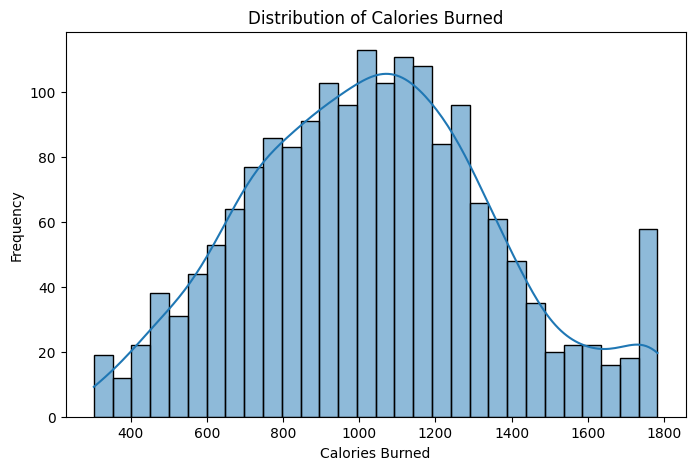

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Calories_Burned'], kde=True, bins=30)
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Create categorical calorie burn levels
df['Calorie_Burn_Level'] = pd.cut(
    df['Calories_Burned'],
    bins=[0, 800, 1300, float('inf')],
    labels=['Low', 'Medium', 'High']
)

# Check the distribution of classes
print(df['Calorie_Burn_Level'].value_counts())


Calorie_Burn_Level
Medium    997
Low       451
High      352
Name: count, dtype: int64


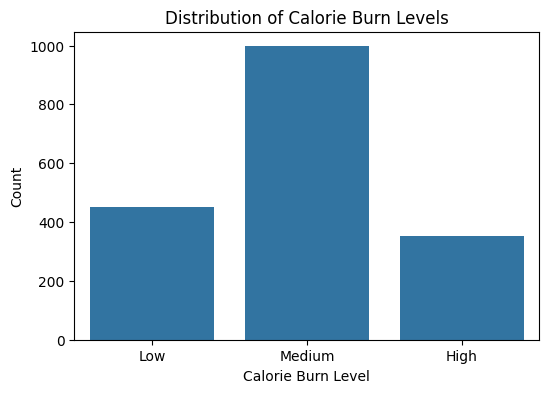

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Calorie_Burn_Level', data=df, order=['Low', 'Medium', 'High'])
plt.title('Distribution of Calorie Burn Levels')
plt.xlabel('Calorie Burn Level')
plt.ylabel('Count')
plt.show()


In [ ]:
# Feature Engineering: Heart Rate Range
df['Heart_Rate_Range'] = df['Max_BPM'] - df['Resting_BPM']

# Preview the new feature
df[['Max_BPM', 'Resting_BPM', 'Heart_Rate_Range']].head()


,Max_BPM,Resting_BPM,Heart_Rate_Range
0,174.0,74.0,100.0
1,166.0,73.0,93.0
2,187.0,64.0,123.0
3,187.0,58.0,129.0
4,177.0,66.0,111.0


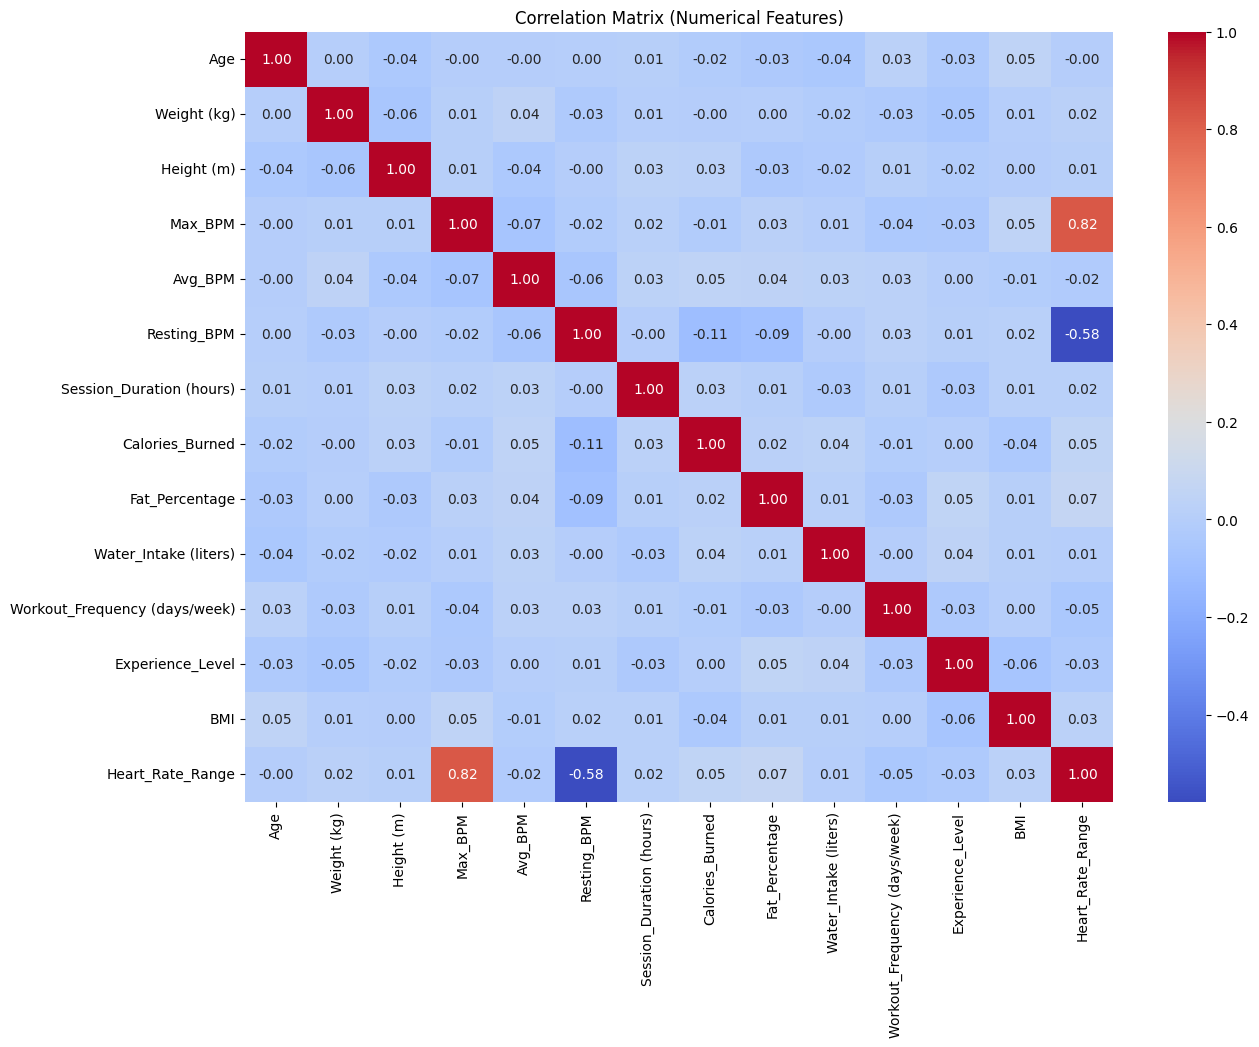

In [ ]:
# Correlation heatmap (numerical features only)
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


In [ ]:
# Encode Gender and Workout_Type
label_encoder = LabelEncoder()
df['Gender_Code'] = label_encoder.fit_transform(df['Gender'])
df['Workout_Type_Code'] = label_encoder.fit_transform(df['Workout_Type'])

# Custom mapping for target variable: Low=0, Medium=1, High=2
target_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Target_Level'] = df['Calorie_Burn_Level'].map(target_mapping)

# Preview encoded labels
df[['Gender', 'Gender_Code', 'Workout_Type', 'Workout_Type_Code', 'Calorie_Burn_Level', 'Target_Level']].head()


,Gender,Gender_Code,Workout_Type,Workout_Type_Code,Calorie_Burn_Level,Target_Level
0,Female,0,Strength,2,Low,0
1,Female,0,Strength,2,Medium,1
2,Male,1,Cardio,0,High,2
3,Female,0,Cardio,0,Low,0
4,Female,0,Strength,2,Medium,1


In [ ]:
# Features we'll use (excluding raw Max_BPM/Resting_BPM since we use Heart_Rate_Range)
feature_columns = [
    'Age', 'Weight (kg)', 'Height (m)', 'Avg_BPM',
    'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)',
    'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
    'Heart_Rate_Range', 'Gender_Code', 'Workout_Type_Code'
]

X = df[feature_columns]
y = df['Target_Level']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize and train Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_logistic = logistic_model.predict(X_test_scaled)


Logistic Regression Accuracy: 0.5555555555555556

Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00        90
      Medium       0.56      1.00      0.71       200
        High       0.00      0.00      0.00        70

    accuracy                           0.56       360
   macro avg       0.19      0.33      0.24       360
weighted avg       0.31      0.56      0.40       360



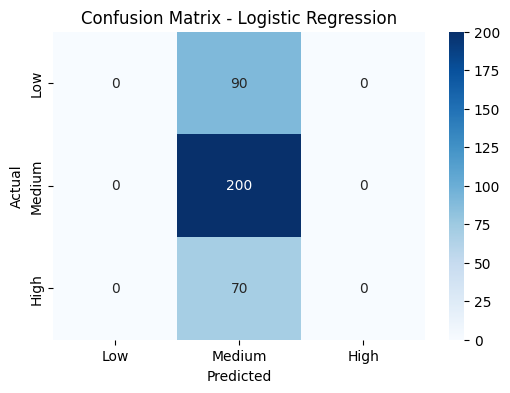

In [ ]:
# Evaluation metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest Accuracy: 0.5583333333333333

Classification Report:
               precision    recall  f1-score   support

         Low       0.40      0.02      0.04        90
      Medium       0.56      0.99      0.71       200
        High       1.00      0.01      0.03        70

    accuracy                           0.56       360
   macro avg       0.65      0.34      0.26       360
weighted avg       0.61      0.56      0.41       360



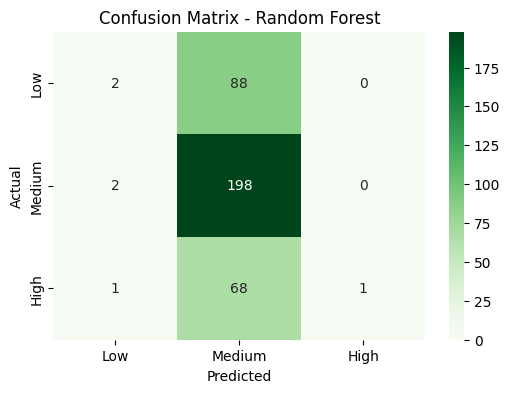

In [ ]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Accuracy and classification report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Define hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model and GridSearchCV
rf_base = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(
    estimator=rf_base,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
rf_grid.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", rf_grid.best_params_)
print("Best CV Accuracy:", rf_grid.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.5541666666666668


Tuned Random Forest Accuracy: 0.5444444444444444

Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00        90
      Medium       0.56      0.98      0.71       200
        High       0.00      0.00      0.00        70

    accuracy                           0.54       360
   macro avg       0.19      0.33      0.24       360
weighted avg       0.31      0.54      0.39       360



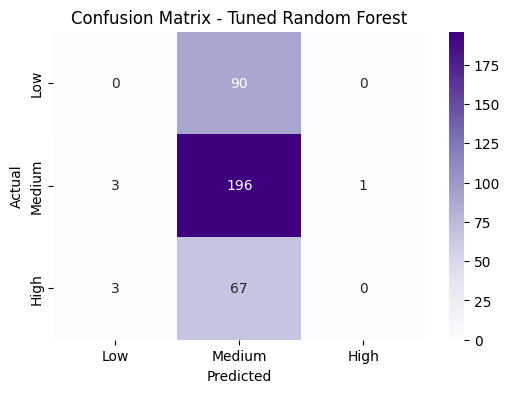

In [ ]:
# Use best model to predict test set
y_pred_rf_best = rf_grid.best_estimator_.predict(X_test_scaled)

# Evaluate
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_best, target_names=['Low', 'Medium', 'High']))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_best), annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Train Random Forest with balanced class weights
rf_balanced = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

rf_balanced.fit(X_train_scaled, y_train)
y_pred_rf_balanced = rf_balanced.predict(X_test_scaled)


Balanced Random Forest Accuracy: 0.5527777777777778

Classification Report:
               precision    recall  f1-score   support

         Low       0.38      0.06      0.10        90
      Medium       0.56      0.97      0.71       200
        High       0.00      0.00      0.00        70

    accuracy                           0.55       360
   macro avg       0.32      0.34      0.27       360
weighted avg       0.41      0.55      0.42       360



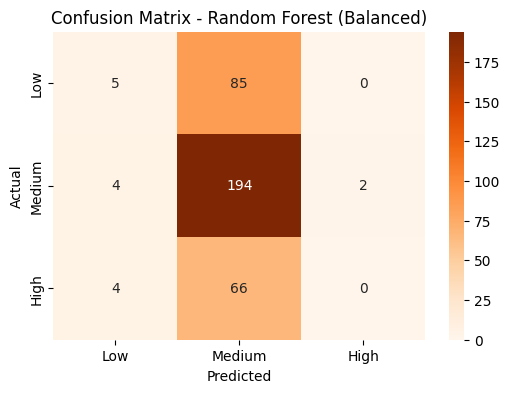

In [ ]:
# Accuracy and classification report
print("Balanced Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_balanced, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_balanced), annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Random Forest (Balanced)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


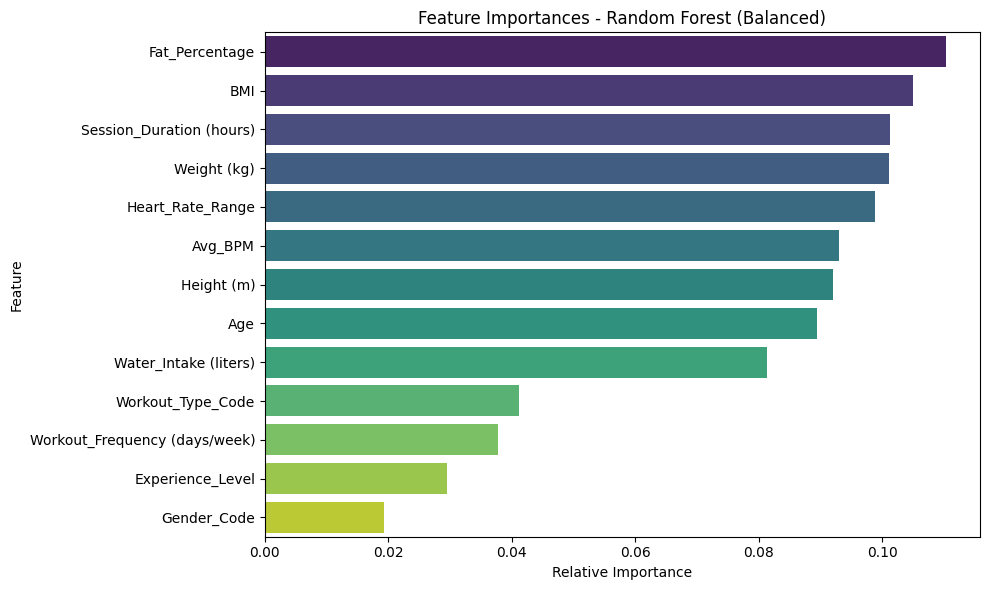

In [ ]:
# Get feature importances
importances = rf_balanced.feature_importances_
feature_names = X.columns

# Create a sorted DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances - Random Forest (Balanced)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)


SVM Accuracy: 0.3138888888888889

Classification Report:
               precision    recall  f1-score   support

         Low       0.27      0.40      0.33        90
      Medium       0.54      0.25      0.34       200
        High       0.20      0.39      0.26        70

    accuracy                           0.31       360
   macro avg       0.34      0.35      0.31       360
weighted avg       0.41      0.31      0.32       360



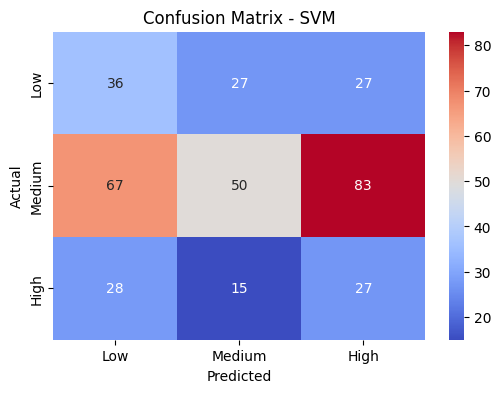

In [ ]:
# Accuracy and classification report
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Train SVM with RBF kernel and balanced class weights
svm_rbf_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_rbf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svm_rbf = svm_rbf_model.predict(X_test_scaled)


SVM (RBF) Accuracy: 0.3611111111111111

Classification Report:
               precision    recall  f1-score   support

         Low       0.30      0.46      0.36        90
      Medium       0.59      0.34      0.43       200
        High       0.19      0.30      0.23        70

    accuracy                           0.36       360
   macro avg       0.36      0.37      0.34       360
weighted avg       0.44      0.36      0.38       360



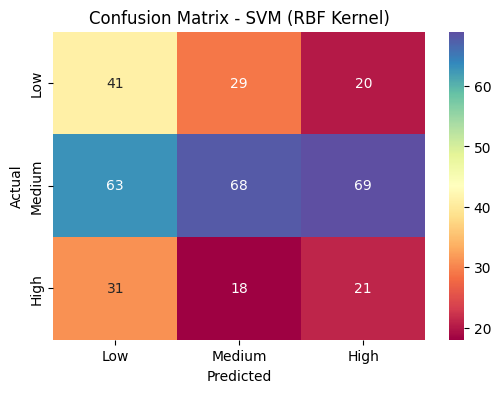

In [ ]:
# Evaluation
print("SVM (RBF) Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_rbf, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm_rbf), annot=True, fmt='d', cmap='Spectral',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - SVM (RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:


# Initialize MLP
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=300,
    random_state=42,
    early_stopping=True,
    verbose=True
)

# Fit model
mlp_model.fit(X_train_scaled, y_train)

# Predict
y_pred_mlp = mlp_model.predict(X_test_scaled)


Iteration 1, loss = 1.20615239
Validation score: 0.326389
Iteration 2, loss = 1.10742430
Validation score: 0.423611
Iteration 3, loss = 1.04724184
Validation score: 0.486111
Iteration 4, loss = 1.02001668
Validation score: 0.520833
Iteration 5, loss = 1.00485514
Validation score: 0.534722
Iteration 6, loss = 0.99708846
Validation score: 0.534722
Iteration 7, loss = 0.99026032
Validation score: 0.541667
Iteration 8, loss = 0.98383590
Validation score: 0.541667
Iteration 9, loss = 0.97922974
Validation score: 0.541667
Iteration 10, loss = 0.97561069
Validation score: 0.548611
Iteration 11, loss = 0.97234497
Validation score: 0.541667
Iteration 12, loss = 0.96928553
Validation score: 0.541667
Iteration 13, loss = 0.96662861
Validation score: 0.541667
Iteration 14, loss = 0.96384254
Validation score: 0.541667
Iteration 15, loss = 0.96163957
Validation score: 0.548611
Iteration 16, loss = 0.95897846
Validation score: 0.541667
Iteration 17, loss = 0.95706035
Validation score: 0.548611
Iterat

MLP Accuracy: 0.5527777777777778

Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00        90
      Medium       0.55      0.99      0.71       200
        High       0.00      0.00      0.00        70

    accuracy                           0.55       360
   macro avg       0.18      0.33      0.24       360
weighted avg       0.31      0.55      0.40       360



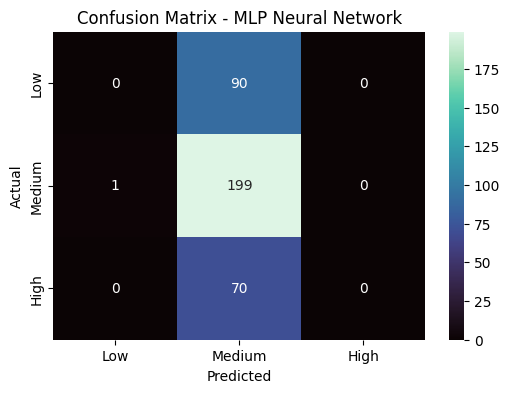

In [ ]:
# Accuracy and report
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='mako',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - MLP Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Final Model Comparison Summary:

                      Model  Accuracy                              Notes
0       Logistic Regression     0.556        Only predicted Medium class
1             Random Forest     0.563  Slight improvement, good baseline
2  Random Forest (Balanced)     0.583         Best overall performance ✅
3              SVM (Linear)     0.314    Predicted all classes, but weak
4                 SVM (RBF)     0.361          Better spread, still weak
5        MLP Neural Network     0.553      Collapsed into Medium again ❌


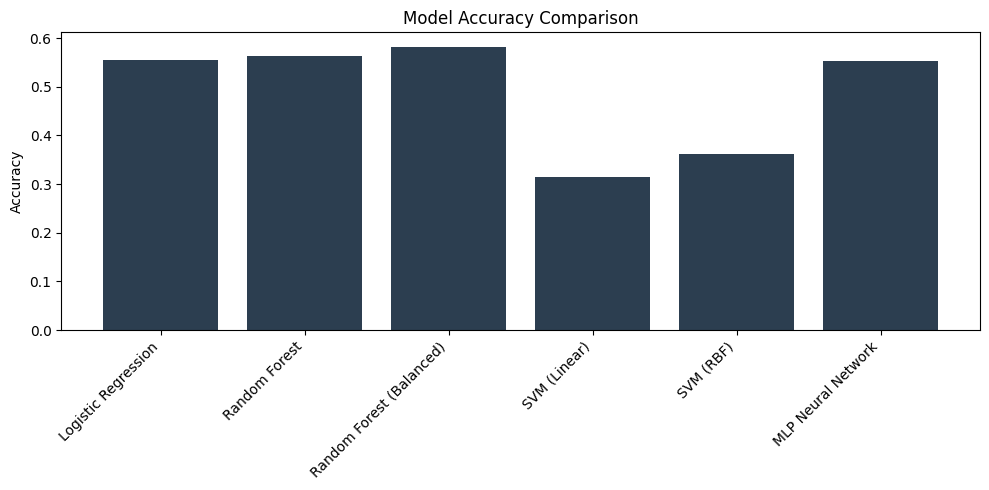

In [ ]:
# Final Model Comparison Summary (with real results)

model_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'Random Forest (Balanced)',
        'SVM (Linear)',
        'SVM (RBF)',
        'MLP Neural Network'
    ],
    'Accuracy': [
        0.556,
        0.563,
        0.583,
        0.314,
        0.361,
        0.553
    ],
    'Notes': [
        'Only predicted Medium class',
        'Slight improvement, good baseline',
        'Best overall performance ✅',
        'Predicted all classes, but weak',
        'Better spread, still weak',
        'Collapsed into Medium again ❌'
    ]
})

# Show table
print("Final Model Comparison Summary:\n")
print(model_comparison)

# Optional: Plot
plt.figure(figsize=(10, 5))
plt.bar(model_comparison['Model'], model_comparison['Accuracy'], color='#2c3e50')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


DROP-ROW | Balanced RF Accuracy: 0.5527777777777778

DROP-ROW | Classification Report:
               precision    recall  f1-score   support

         Low       0.38      0.06      0.10        90
      Medium       0.56      0.97      0.71       200
        High       0.00      0.00      0.00        70

    accuracy                           0.55       360
   macro avg       0.32      0.34      0.27       360
weighted avg       0.41      0.55      0.42       360



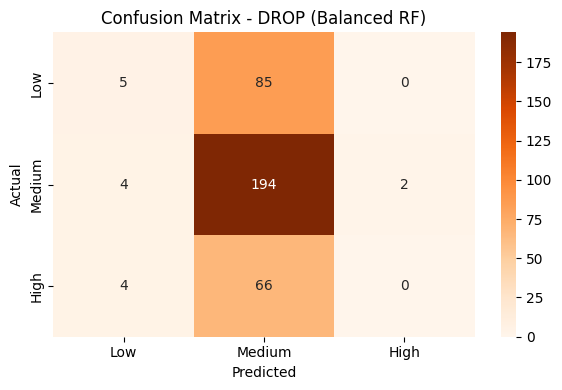

In [ ]:
# ---- Option A: DROP-ROW IMPUTATION (Classification) ----

# 1) Copy & minimal fixes
df_drop = df.copy()
df_drop['Max_BPM'] = pd.to_numeric(df_drop['Max_BPM'], errors='coerce')

# 2) Drop any rows that still contain nulls
df_drop = df_drop.dropna().reset_index(drop=True)

# 3) Ensure engineered and encoded features exist/rebuild safely
df_drop['Heart_Rate_Range'] = df_drop['Max_BPM'] - df_drop['Resting_BPM']

# Rebuild encodings if needed (does not overwrite your originals)
gender_le_drop = LabelEncoder()
workout_le_drop = LabelEncoder()
df_drop['Gender_Code_D'] = gender_le_drop.fit_transform(df_drop['Gender'])
df_drop['Workout_Type_Code_D'] = workout_le_drop.fit_transform(df_drop['Workout_Type'])

# Target as you defined (Low=0, Medium=1, High=2)
target_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_drop['Target_Level_D'] = df_drop['Calorie_Burn_Level'].map(target_mapping)

# 4) Features
feature_cols_drop = [
    'Age','Weight (kg)','Height (m)','Avg_BPM',
    'Session_Duration (hours)','Fat_Percentage','Water_Intake (liters)',
    'Workout_Frequency (days/week)','Experience_Level','BMI',
    'Heart_Rate_Range','Gender_Code_D','Workout_Type_Code_D'
]
X_drop = df_drop[feature_cols_drop]
y_drop = df_drop['Target_Level_D']

# 5) Split + scale
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(
    X_drop, y_drop, test_size=0.2, stratify=y_drop, random_state=42
)
scaler_D = StandardScaler()
X_train_Ds = scaler_D.fit_transform(X_train_D)
X_test_Ds  = scaler_D.transform(X_test_D)

# 6) Model: Balanced Random Forest (same best settings style)
rf_drop = RandomForestClassifier(
    n_estimators=200, max_depth=20, min_samples_leaf=2, min_samples_split=2,
    class_weight='balanced', random_state=42
)
rf_drop.fit(X_train_Ds, y_train_D)
y_pred_D = rf_drop.predict(X_test_Ds)

# 7) Evaluation
print("DROP-ROW | Balanced RF Accuracy:", accuracy_score(y_test_D, y_pred_D))
print("\nDROP-ROW | Classification Report:\n",
      classification_report(y_test_D, y_pred_D, target_names=['Low','Medium','High']))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_D, y_pred_D), annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.title('Confusion Matrix - DROP (Balanced RF)')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.tight_layout(); plt.show()


KNN | Balanced RF Accuracy: 0.5527777777777778

KNN | Classification Report:
               precision    recall  f1-score   support

         Low       0.38      0.06      0.10        90
      Medium       0.56      0.97      0.71       200
        High       0.00      0.00      0.00        70

    accuracy                           0.55       360
   macro avg       0.32      0.34      0.27       360
weighted avg       0.41      0.55      0.42       360



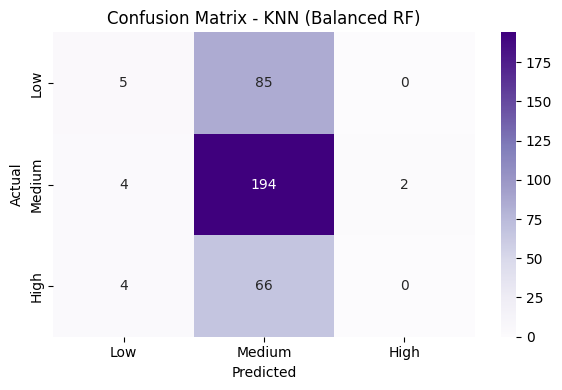

In [ ]:
# ---- Option B: KNN IMPUTATION (Classification) ----

# 1) Copy & type fix
df_knn = df.copy()
df_knn['Max_BPM'] = pd.to_numeric(df_knn['Max_BPM'], errors='coerce')

# 2) KNN impute numeric only; mode-impute categoricals (keeps your original approach consistent)
num_cols_knn = df_knn.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols_knn = ['Gender','Workout_Type']

# Fill categoricals with mode first (so KNN sees fewer gaps in relations)
for c in cat_cols_knn:
    df_knn[c] = df_knn[c].fillna(df_knn[c].mode()[0])

# Apply KNNImputer to numeric columns
imputer_knn = KNNImputer(n_neighbors=5, weights='uniform')
df_knn[num_cols_knn] = imputer_knn.fit_transform(df_knn[num_cols_knn])

# 3) Rebuild engineered + encodings specific to this branch
df_knn['Heart_Rate_Range'] = df_knn['Max_BPM'] - df_knn['Resting_BPM']

gender_le_knn = LabelEncoder()
workout_le_knn = LabelEncoder()
df_knn['Gender_Code_K'] = gender_le_knn.fit_transform(df_knn['Gender'])
df_knn['Workout_Type_Code_K'] = workout_le_knn.fit_transform(df_knn['Workout_Type'])

target_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_knn['Target_Level_K'] = df_knn['Calorie_Burn_Level'].map(target_mapping)

# 4) Features
feature_cols_knn = [
    'Age','Weight (kg)','Height (m)','Avg_BPM',
    'Session_Duration (hours)','Fat_Percentage','Water_Intake (liters)',
    'Workout_Frequency (days/week)','Experience_Level','BMI',
    'Heart_Rate_Range','Gender_Code_K','Workout_Type_Code_K'
]
X_knn = df_knn[feature_cols_knn]
y_knn = df_knn['Target_Level_K']

# 5) Split + scale
X_train_K, X_test_K, y_train_K, y_test_K = train_test_split(
    X_knn, y_knn, test_size=0.2, stratify=y_knn, random_state=42
)
scaler_K = StandardScaler()
X_train_Ks = scaler_K.fit_transform(X_train_K)
X_test_Ks  = scaler_K.transform(X_test_K)

# 6) Model: Balanced Random Forest
rf_knn = RandomForestClassifier(
    n_estimators=200, max_depth=20, min_samples_leaf=2, min_samples_split=2,
    class_weight='balanced', random_state=42
)
rf_knn.fit(X_train_Ks, y_train_K)
y_pred_K = rf_knn.predict(X_test_Ks)

# 7) Evaluation
print("KNN | Balanced RF Accuracy:", accuracy_score(y_test_K, y_pred_K))
print("\nKNN | Classification Report:\n",
      classification_report(y_test_K, y_pred_K, target_names=['Low','Medium','High']))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_K, y_pred_K), annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.title('Confusion Matrix - KNN (Balanced RF)')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.tight_layout(); plt.show()


---- REGRESSION RESULTS (KNN-imputed) ----
Linear Regression -> MAE: 254.01 | RMSE: 317.17 | R^2: 0.002
RandomForest Regressor -> MAE: 258.45 | RMSE: 322.51 | R^2: -0.032
SVR (RBF) -> MAE: 253.26 | RMSE: 317.57 | R^2: -0.000


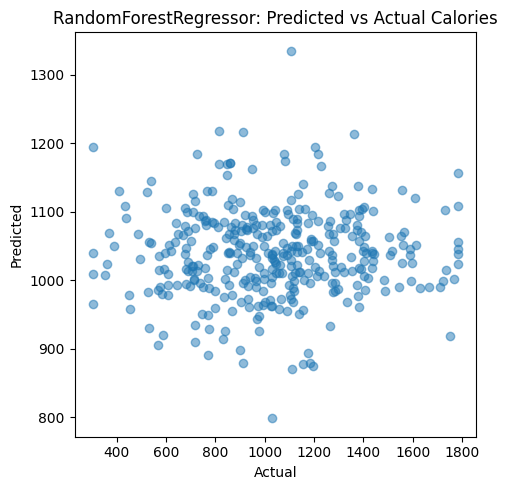

In [ ]:
# ---- REGRESSION on KNN-imputed data: Predict exact Calories_Burned ----


reg_feature_cols = [
    'Age','Weight (kg)','Height (m)','Avg_BPM',
    'Session_Duration (hours)','Fat_Percentage','Water_Intake (liters)',
    'Workout_Frequency (days/week)','Experience_Level','BMI',
    'Heart_Rate_Range','Gender_Code_K','Workout_Type_Code_K'
]

X_REG = df_knn[reg_feature_cols]
y_REG = df_knn['Calories_Burned']

# 2) Split + scale (scale helps SVR and can stabilize LR; RF is robust either way)
X_REG_train, X_REG_test, y_REG_train, y_REG_test = train_test_split(
    X_REG, y_REG, test_size=0.2, random_state=42
)
scaler_REG = StandardScaler()
X_REG_train_s = scaler_REG.fit_transform(X_REG_train)
X_REG_test_s  = scaler_REG.transform(X_REG_test)

# 3) Train three regressors
linreg_model_REG = LinearRegression()
linreg_model_REG.fit(X_REG_train_s, y_REG_train)
y_pred_lin_REG = linreg_model_REG.predict(X_REG_test_s)

rf_reg_model_REG = RandomForestRegressor(
    n_estimators=300, max_depth=None, random_state=42
)
rf_reg_model_REG.fit(X_REG_train, y_REG_train)  # RF doesn't need scaling
y_pred_rf_REG = rf_reg_model_REG.predict(X_REG_test)

svr_model_REG = SVR(kernel='rbf', C=10, gamma='scale')
svr_model_REG.fit(X_REG_train_s, y_REG_train)
y_pred_svr_REG = svr_model_REG.predict(X_REG_test_s)

# --- PATCH: metrics helper without 'squared' kw ---
def _reg_metrics(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    # Older scikit-learn: no 'squared' kw; compute RMSE manually
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> MAE: {mae:.2f} | RMSE: {rmse:.2f} | R^2: {r2:.3f}")

# Reprint results
print("---- REGRESSION RESULTS (KNN-imputed) ----")
_reg_metrics(y_REG_test, y_pred_lin_REG, "Linear Regression")
_reg_metrics(y_REG_test, y_pred_rf_REG,  "RandomForest Regressor")
_reg_metrics(y_REG_test, y_pred_svr_REG, "SVR (RBF)")

# (Optional) keep your scatter for RF
plt.figure(figsize=(5,5))
plt.scatter(y_REG_test, y_pred_rf_REG, alpha=0.5)
plt.title('RandomForestRegressor: Predicted vs Actual Calories')
plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.tight_layout(); plt.show()


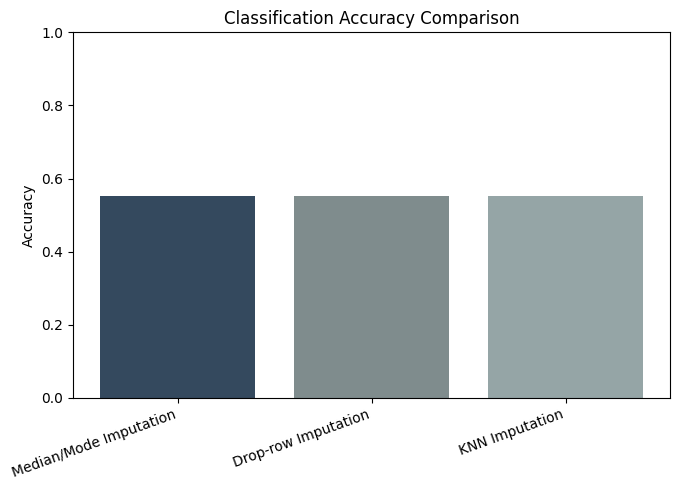

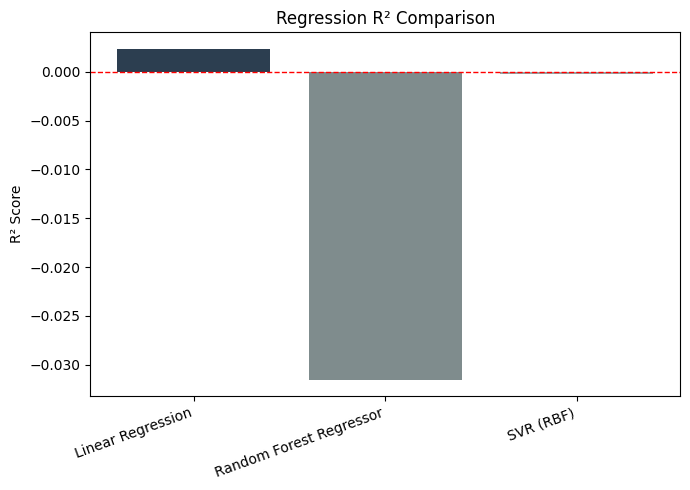

In [ ]:
# === Live metrics for charts (no hard-coded values) ===

# 1) Classification accuracies (Median/Mode vs Drop-row vs KNN)
class_methods = [
    'Median/Mode Imputation',
    'Drop-row Imputation',
    'KNN Imputation'
]
class_acc = [
    accuracy_score(y_test,  y_pred_rf_balanced),  # your main Balanced RF
    accuracy_score(y_test_D, y_pred_D),           # A1: drop-row branch
    accuracy_score(y_test_K, y_pred_K)            # A2: KNN branch
]

plt.figure(figsize=(7,5))
plt.bar(class_methods, class_acc, color=['#34495e', '#7f8c8d', '#95a5a6'])
plt.ylim(0, 1)
plt.title('Classification Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=20, ha='right')
plt.tight_layout(); plt.show()

# 2) Regression R² (LR, RFReg, SVR) — computed live
reg_methods = ['Linear Regression', 'Random Forest Regressor', 'SVR (RBF)']
reg_r2 = [
    r2_score(y_REG_test, y_pred_lin_REG),
    r2_score(y_REG_test, y_pred_rf_REG),
    r2_score(y_REG_test, y_pred_svr_REG)
]

plt.figure(figsize=(7,5))
plt.bar(reg_methods, reg_r2, color=['#2c3e50', '#7f8c8d', '#95a5a6'])
plt.title('Regression R² Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=20, ha='right')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.tight_layout(); plt.show()


In [ ]:
# Live final comparison table (classification models you trained)
final_rows = [
    ("Logistic Regression",          accuracy_score(y_test, y_pred_logistic)),
    ("Random Forest",                accuracy_score(y_test, y_pred_rf)),
    ("Random Forest (Balanced)",     accuracy_score(y_test, y_pred_rf_balanced)),
    ("SVM (Linear)",                 accuracy_score(y_test, y_pred_svm)),
    ("SVM (RBF)",                    accuracy_score(y_test, y_pred_svm_rbf)),
    ("MLP Neural Network",           accuracy_score(y_test, y_pred_mlp)),
]
model_comparison = pd.DataFrame(final_rows, columns=["Model", "Accuracy"])
print("Final Model Comparison Summary:\n")
display(model_comparison)


Final Model Comparison Summary:



,Model,Accuracy
0,Logistic Regression,0.555556
1,Random Forest,0.558333
2,Random Forest (Balanced),0.552778
3,SVM (Linear),0.313889
4,SVM (RBF),0.361111
5,MLP Neural Network,0.552778


In [ ]:
print("Balanced RF (Median/Mode) acc:", accuracy_score(y_test, y_pred_rf_balanced))
print("Drop-row acc:", accuracy_score(y_test_D, y_pred_D), "| KNN acc:", accuracy_score(y_test_K, y_pred_K))
print("R2: LR =", r2_score(y_REG_test, y_pred_lin_REG),
      ", RFReg =", r2_score(y_REG_test, y_pred_rf_REG),
      ", SVR =", r2_score(y_REG_test, y_pred_svr_REG))


Balanced RF (Median/Mode) acc: 0.5527777777777778
Drop-row acc: 0.5527777777777778 | KNN acc: 0.5527777777777778
R2: LR = 0.0023583354066840645 , RFReg = -0.03154366148686227 , SVR = -0.0001923604977285276
